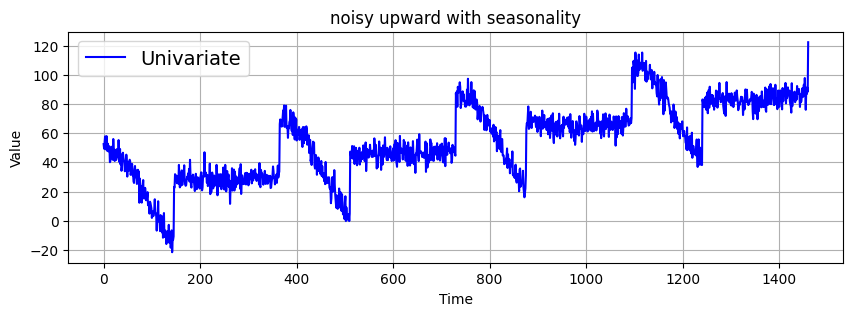

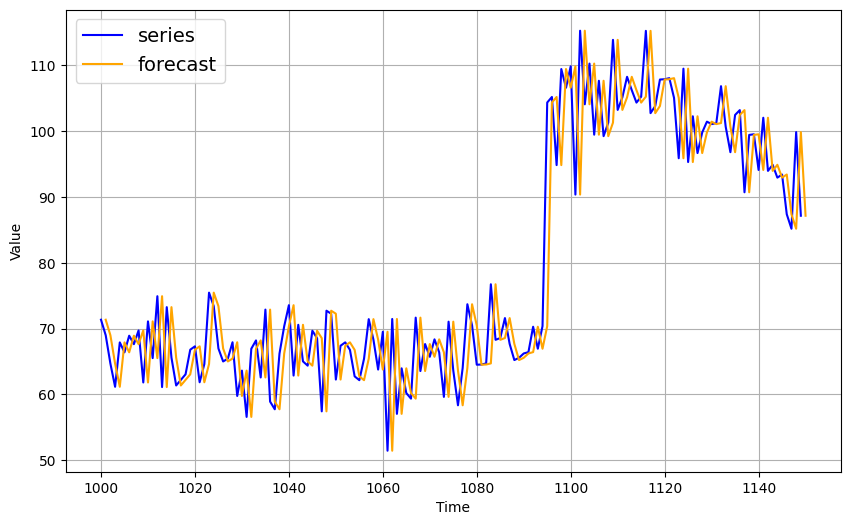

mae: 5.9379085153216735


In [52]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
np.random.seed(seed=42)
def plot_series(time, series, label='Univariate', start=0, end=None, format='-', title='', only=True, col='blue'):
    if only: plt.figure(figsize=(10,3))
    plt.plot(time[start:end],series[start:end], format, label=label, color=col)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.title(title)

trend = lambda time, slope=0: time * slope
time = np.arange(4 * 365 + 1)
baseline = 10
series = baseline + trend(time, 0.1)

#plot_series(time, series, label='upward trend')

# f(x) = {x<0.4: cos(2πx) 
#     {x>0.4: 1/exp(3x)
season_pattern = lambda season_time: np.where(season_time < 0.4, 
                    np.cos(season_time*2*np.pi), 1/np.exp(3 * season_time))

# y = f((t+φ mod p)/p)a
#
seasonality = lambda t,p,phase,amplitude: season_pattern(((t+phase)%p)/p)*amplitude
series=seasonality(time, 365,0,40)
#plot_series(time, series, label='seasonal pattern')
series = baseline + trend(time, 0.05) + seasonality(time,365,0,40)
#plot_series(time, series, title='upward with seasonality')

noise_func = lambda time, noise_lvl: np.random.randn(len(time))*noise_lvl
noise = noise_func(time, 5)
series+=noise
plot_series(time,series, title='noisy upward with seasonality')
plt.show()

split_time=1000
time_train=time[:split_time]
y_train = series[:split_time]

time_val=time[split_time:]
y_val= series[split_time:]

plt.figure(figsize=(10,6))
naive_forecast = series[split_time-1:-1]
plot_series(time_val, y_val, start=0, end=150, label='series', only=False)
plot_series(time_val, naive_forecast, start=1, end=151, label='forecast', only=False, col='orange')
plt.show()
errors = naive_forecast-y_val
abs_errors=np.abs(errors)
print('mae: {}'.format(abs_errors.mean()))


In [53]:
import tensorflow as tf
keras = tf.keras
keras.metrics.MAE(y_val, naive_forecast).numpy()


5.9379085153216735

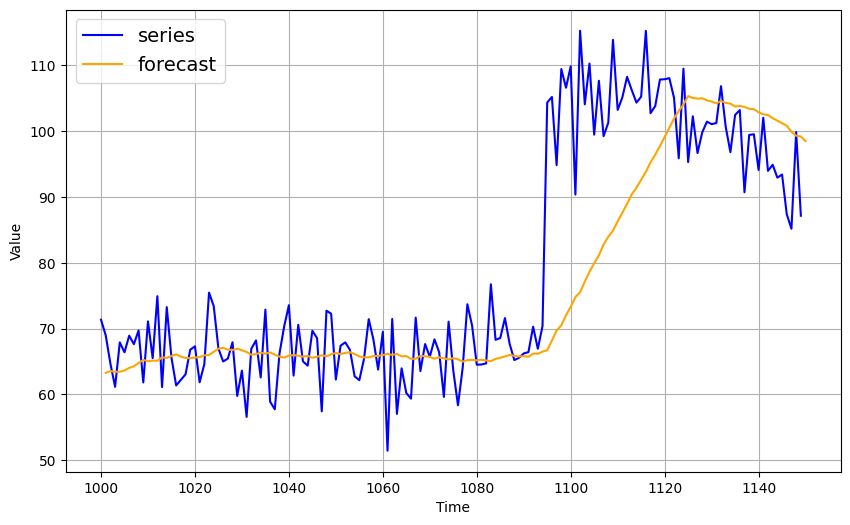

In [54]:
def season_moving_average(series, window):
    forecast=[]
    for time in range(len(series) - window):
        forecast.append(series[time:time+window].mean())
    return forecast

def season_moving_average_faster(series, window):
    mov=np.cumsum(series)
    mov[window:] = mov[window:] - mov[:-window]
    return mov[window -1:-1] / window
mov=season_moving_average_faster(series, 30)[split_time -30:]
plt.figure(figsize=(10,6))
plot_series(time_val, y_val, start=0, end=150, label='series', only=False)
plot_series(time_val, mov, start=1, end=151, label='forecast', only=False, col='orange')
plt.show()


In [55]:
tf.keras.metrics.MAE(y_val, mov).numpy()

7.1424185706207854

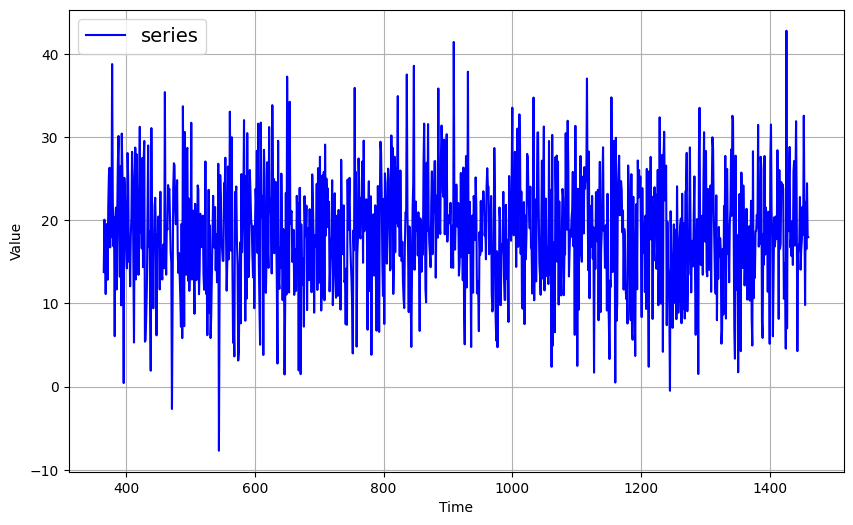

In [56]:
diff_series = series[365:] - series[:-365]
diff_time = time[365:]
plt.figure(figsize=(10,6))
plot_series(diff_time, diff_series, label='series', only=False)
#plot_series(time_val, mov, start=1, end=151, label='forecast', only=False, col='orange')
plt.show()


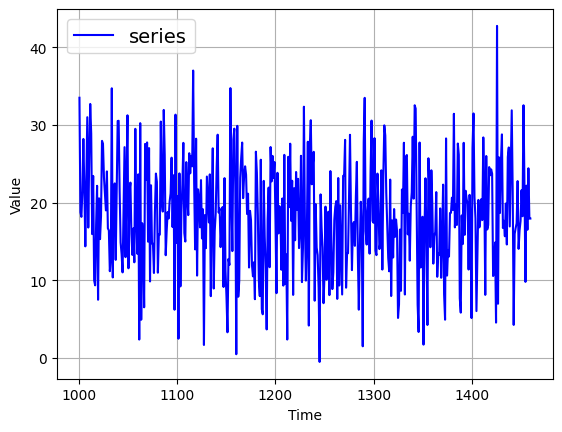

In [57]:
plot_series(time_val, diff_series[split_time-365:], label='series', only=False)


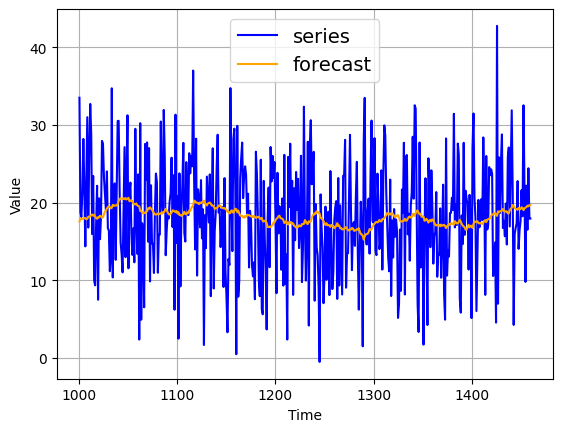

In [58]:


mov=season_moving_average_faster(diff_series, 50)[split_time - 365 - 50:]
plot_series(time_val, diff_series[split_time-365:], label='series', only=False)
plot_series(time_val, mov, label='forecast', only=False, col='orange')
plt.show()



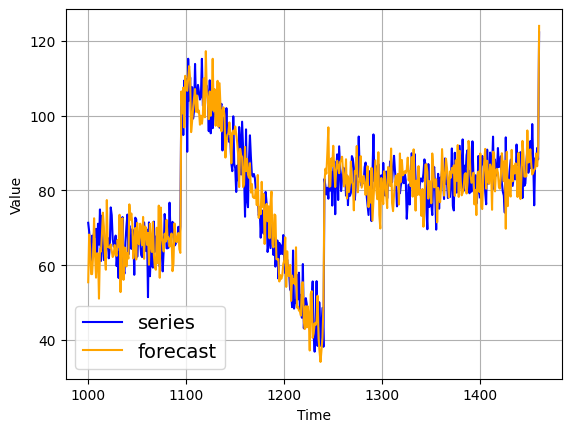

60.20102951032625


In [59]:
diff_mov_and_past=series[split_time-365:-365] + mov
plot_series(time_val, y_val, label='series', only=False)
plot_series(time_val, diff_mov_and_past, label='forecast', only=False, col='orange')
plt.show()
print(tf.keras.metrics.MAE(y_val, mov).numpy())

In [61]:
tf.keras.metrics.MAE(y_val, diff_mov_and_past).numpy()

5.8393105629958955

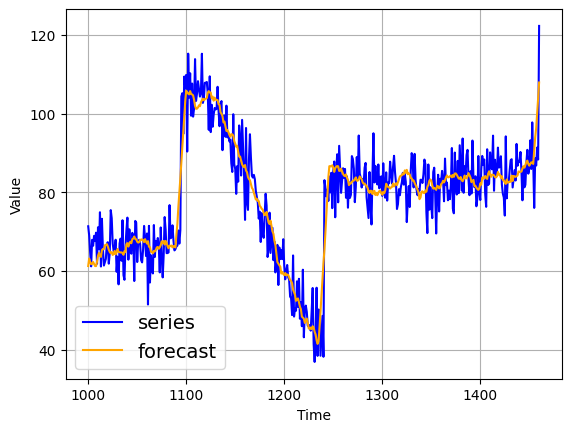

In [64]:
diff_mov_and_past_with_smoothing = season_moving_average_faster(series[split_time-370:-359], 11) + mov
plot_series(time_val, y_val, label='series', only=False)
plot_series(time_val, diff_mov_and_past_with_smoothing, label='forecast', only=False, col='orange')
plt.show()

In [66]:
tf.keras.metrics.MAE(y_val, diff_mov_and_past_with_smoothing).numpy()

4.566859958970771